# Image restoration

Import the required modules.

In [1]:
import matplotlib.pyplot as plt
import numpy as np
from pathlib import Path
import skimage.io
%matplotlib inline

This is one of the original images, it clearly shows a pattern of dark horizontal lines across the entire image.

![original image](Data/problem.jpg)

Read the image.

In [2]:
img = skimage.io.imread('Data/problem.jpg')

In [3]:
img.shape

(3648, 2736, 3)

To identify the horizontal black lines, lets compute the average along axis 1 of the image. We also avarage over the three color channels.

In [4]:
y_mean = img.mean(axis=0).mean(axis=1)

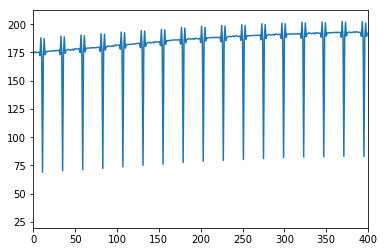

In [5]:
plt.plot(y_mean)
plt.xlim(0, 400);

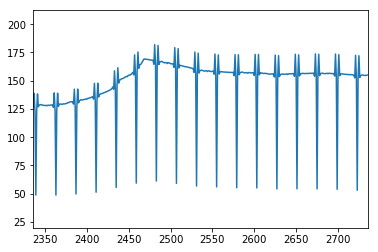

In [6]:
plt.plot(y_mean)
plt.xlim(y_mean.shape[0] - 400, y_mean.shape[0]);

The shape is pretty peculiar, 5 lines are affected.

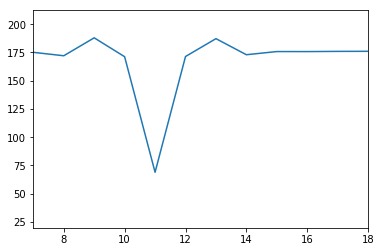

In [7]:
plt.plot(y_mean)
plt.xlim(7, 18);

Let's check the three color channels separately.

In [8]:
y_mean_colors = img.mean(axis=0)

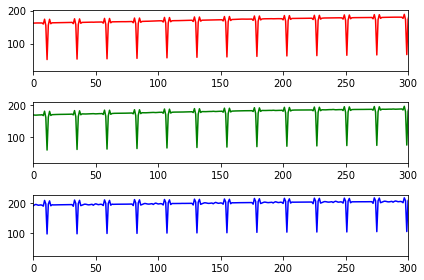

In [9]:
fig = plt.figure()
for i, color in enumerate(['red', 'green', 'blue']):
    axis = fig.add_subplot(3, 1, i + 1)
    axis.plot(y_mean_colors[:, i], color=color)
    axis.set_xlim(0, 300)
plt.tight_layout()

Given the shape of the minima over the average values, it could be that the dark lines are not straight. Since this would complicate our task, let's verify.

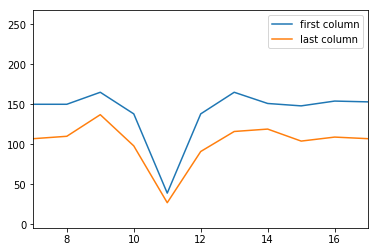

In [10]:
plt.plot(img[0, :, 0], label='first column')
plt.plot(img[-1, :, 0], label='last column')
plt.xlim(7, 17)
plt.legend();

Compare the dark line with one that is a a distance of 4, and that should have the appropriate value.

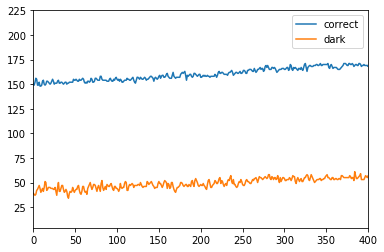

In [11]:
plt.plot(img[:, 7, 0], label="correct")
plt.plot(img[:, 11, 0], label="dark")
plt.xlim(0, 400)
plt.legend();

Define a kernel for the 1D convolution.  The lines at distance 4 and 5 from the dark line should fully contribute, while lines closer to the dark line should be ignored.

Apply the convolution, starting at line 11, and further for every 24th line in the image.

In [12]:
kernel = np.array(
    [1.0, 1.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 1.0, 1.0],
)
size = kernel.size//2
kernel /= sum(kernel)
new_img = img.copy()
for line in range(11, new_img.shape[1], 24):
    for color in range(new_img.shape[2]):
        left = line - size
        right = line + size + 1
        new_img[:, line, color] = img[:, left:right, color].reshape((img.shape[0], kernel.size)) @ kernel
    new_img[:, line - 3, :] = new_img[:, line - 4, :]
    new_img[:, line - 1, :] = new_img[:, line, :]
    new_img[:, line - 2, :] = new_img[:, line - 1, :]
    new_img[:, line + 1, :] = new_img[:, line, :].copy()
    new_img[:, line + 3, :] = img[:, line + 4, :].copy()
    new_img[:, line + 2, :] = new_img[:, line + 1, :]

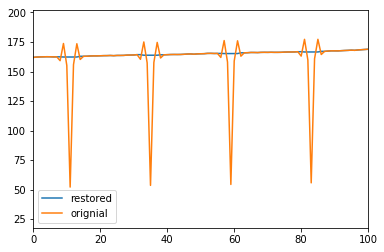

In [13]:
plt.plot(new_img[:, :, 0].mean(axis=0), label='restored')
plt.plot(img[:, :, 0].mean(axis=0), label='orignial')
plt.xlim(0, 100)
plt.legend();

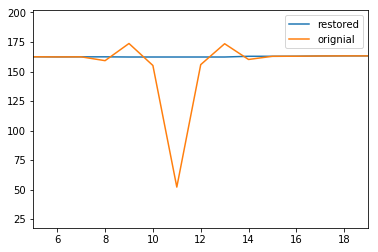

In [14]:
plt.plot(new_img[:, :, 0].mean(axis=0), label='restored')
plt.plot(img[:, :, 0].mean(axis=0), label='orignial')
plt.xlim(5, 19)
plt.legend();

Save the new image to a JPEG file, and display it.

In [15]:
skimage.io.imsave('Data/restored.jpg', new_img)

![restored image](Data/restored.jpg)